In [47]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from  sklearn.ensemble  import  GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
##载入示例数据 10维度
X, y = make_hastie_10_2(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)##test_size测试集合所占比例


默认GBDT参数
---

In [48]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) 
print"Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) 

AUC Score : 0.974248
Accuracy : 0.8995


默认Xgboost参数
---

In [49]:
auc_Score=[]
accuracy=[]
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) 
print"Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre)
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.972424
Accuracy : 0.8993


调整Xgboost参数
---

第一步：初始学习速率0.1和tree_based参数调优的估计器数目100
给其他参数一个初始值。
1. max_depth = 5 :默认6树的最大深度，这个参数的取值最好在3-10之间。
2. min_child_weight = 1:默认是1决定最小叶子节点样本权重和。如果是一个极不平衡的分类问题，某些叶子节点下的值会比较小，这个值取小点。
3. gamma = 0: 默认0，在0.1到0.2之间就可以。树的叶子节点上作进一步分裂所需的最小损失减少。这个参数后继也是要调整的。
4. subsample, colsample_bytree = 0.8: 样本采样、列采样。典型值的范围在0.5-0.9之间。
5. scale_pos_weight = 1:默认1,如果类别十分不平衡取较大正值。 

In [52]:
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=100, #树的个数
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 scale_pos_weight=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) 
print"Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) 
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.978546
Accuracy : 0.9133


'n_estimators':[100,200,500,1000,1500] 

取1000最好

In [53]:
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=1000, #树的个数
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 scale_pos_weight=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) 
print"Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) 
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.989145
Accuracy : 0.9405


第二步： max_depth 和 min_weight 它们对最终结果有很大的影响

max_depth range(3,10,2)=[3, 5, 7, 9]

min_weight range(1,6,2)=[1, 3, 5]

max_depth=3  min_weight=1 最好

In [54]:
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=1000, #树的个数
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 scale_pos_weight=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) 
print"Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) 
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.991693
Accuracy : 0.9485


第三步：gamma参数调优

'gamma':[i/10.0 for i in range(0,7)]=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

gamma=0.5 最好

In [55]:
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=1000, #树的个数
 max_depth=3,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 scale_pos_weight=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) 
print"Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) 
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.991749
Accuracy : 0.9497


第四步：调整subsample 和 colsample_bytree 参数

 'subsample':[i/10.0 for i in range(6,10)]=[0.6, 0.7, 0.8, 0.9]
 
 'colsample_bytree':[i/10.0 for i in range(6,10)]=[0.6, 0.7, 0.8, 0.9]
 
 'subsample': 0.6, 'colsample_bytree': 0.6 最好

In [56]:
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=1000, #树的个数
 max_depth=3,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.6,
 colsample_bytree=0.6,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 scale_pos_weight=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) 
print"Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) 
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.992504
Accuracy : 0.954


第五步：正则化参数调优

'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]=[1e-05, 0.01, 0.1, 1, 100] 默认0 L1正则项参数，参数值越大，模型越不容易过拟合

'reg_lambda':[1,5,10,50]        默认1L2正则项参数，参数值越大，模型越不容易过拟合

{'reg_alpha': 1e-05, 'reg_lambda': 1}  正则变化不大

In [57]:
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=1000, #树的个数
 max_depth=3,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.6,
 colsample_bytree=0.6,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 scale_pos_weight=1,
 reg_alpha=1e-05,
 reg_lambda=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) 
print"Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) 
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.992504
Accuracy : 0.954


第6步：进一步 降低学习速率 增加更多的树

'learning_rate':[0.01,0.1,0.3]

'learning_rate': 0.1 不变

'n_estimators':[1000,1200,1500,2000,2500]

'n_estimators': 2000 较好

In [58]:
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=2000, #树的个数
 max_depth=3,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.6,
 colsample_bytree=0.6,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 scale_pos_weight=1,
 reg_alpha=1e-05,
 reg_lambda=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) 
print"Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) 
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.993114
Accuracy : 0.957


绘图查看auc与准确率的变化情况
----

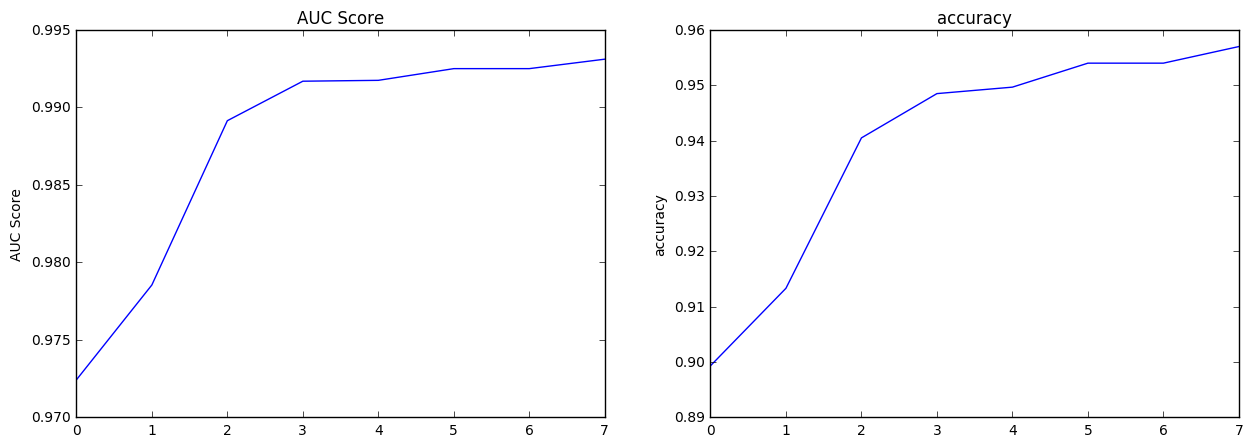

In [76]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,5))
p1=fig.add_subplot(1,2,1)
p1.plot(auc_Score)
p1.set_ylabel('AUC Score')
p1.set_title('AUC Score')
p2=fig.add_subplot(1,2,2)
p2.plot(accuracy)
p2.set_ylabel('accuracy')
p2.set_title('accuracy')
plt.show()